In [8]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from pathlib import Path
from collections import Counter

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## Dataset Loading & Overview

In [9]:
# Set paths
DATA_DIR = Path('.//dog-breed-identification')
TRAIN_DIR = DATA_DIR / 'train'
TEST_DIR = DATA_DIR / 'test'
LABELS_FILE = DATA_DIR / 'labels.csv'

df_labels = pd.read_csv(LABELS_FILE)

# Overview
display(df_labels.head())
print(f"Total training images: {len(df_labels)}")
print(f"Total of unique breeds: {df_labels['breed'].nunique()}\n")
print(f"Missing values:")
print(df_labels.isnull().sum())

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

Total training images: 10222
Total of unique breeds: 120

Missing values:
id       0
breed    0
dtype: int64


## Class Distribution Analysis

In [10]:
# Count sample per breed
breed_counts = df_labels['breed'].value_counts()

print(breed_counts.describe())

print(f"\nTop 5 most common breeds:")
for i, (breed, count) in enumerate(breed_counts.head().items(), 1):
    print(f"{i}. {breed}: {count} images")

print(f"\nBottom 5 least common breeds:")
for i, (breed, count) in enumerate(breed_counts.tail().items(), 1):
    print(f"{i}. {breed}: {count} images")

count    120.000000
mean      85.183333
std       13.298122
min       66.000000
25%       75.000000
50%       82.000000
75%       91.250000
max      126.000000
Name: count, dtype: float64

Top 5 most common breeds:
1. scottish_deerhound: 126 images
2. maltese_dog: 117 images
3. afghan_hound: 116 images
4. entlebucher: 115 images
5. bernese_mountain_dog: 114 images

Bottom 5 least common breeds:
1. golden_retriever: 67 images
2. komondor: 67 images
3. brabancon_griffon: 67 images
4. eskimo_dog: 66 images
5. briard: 66 images


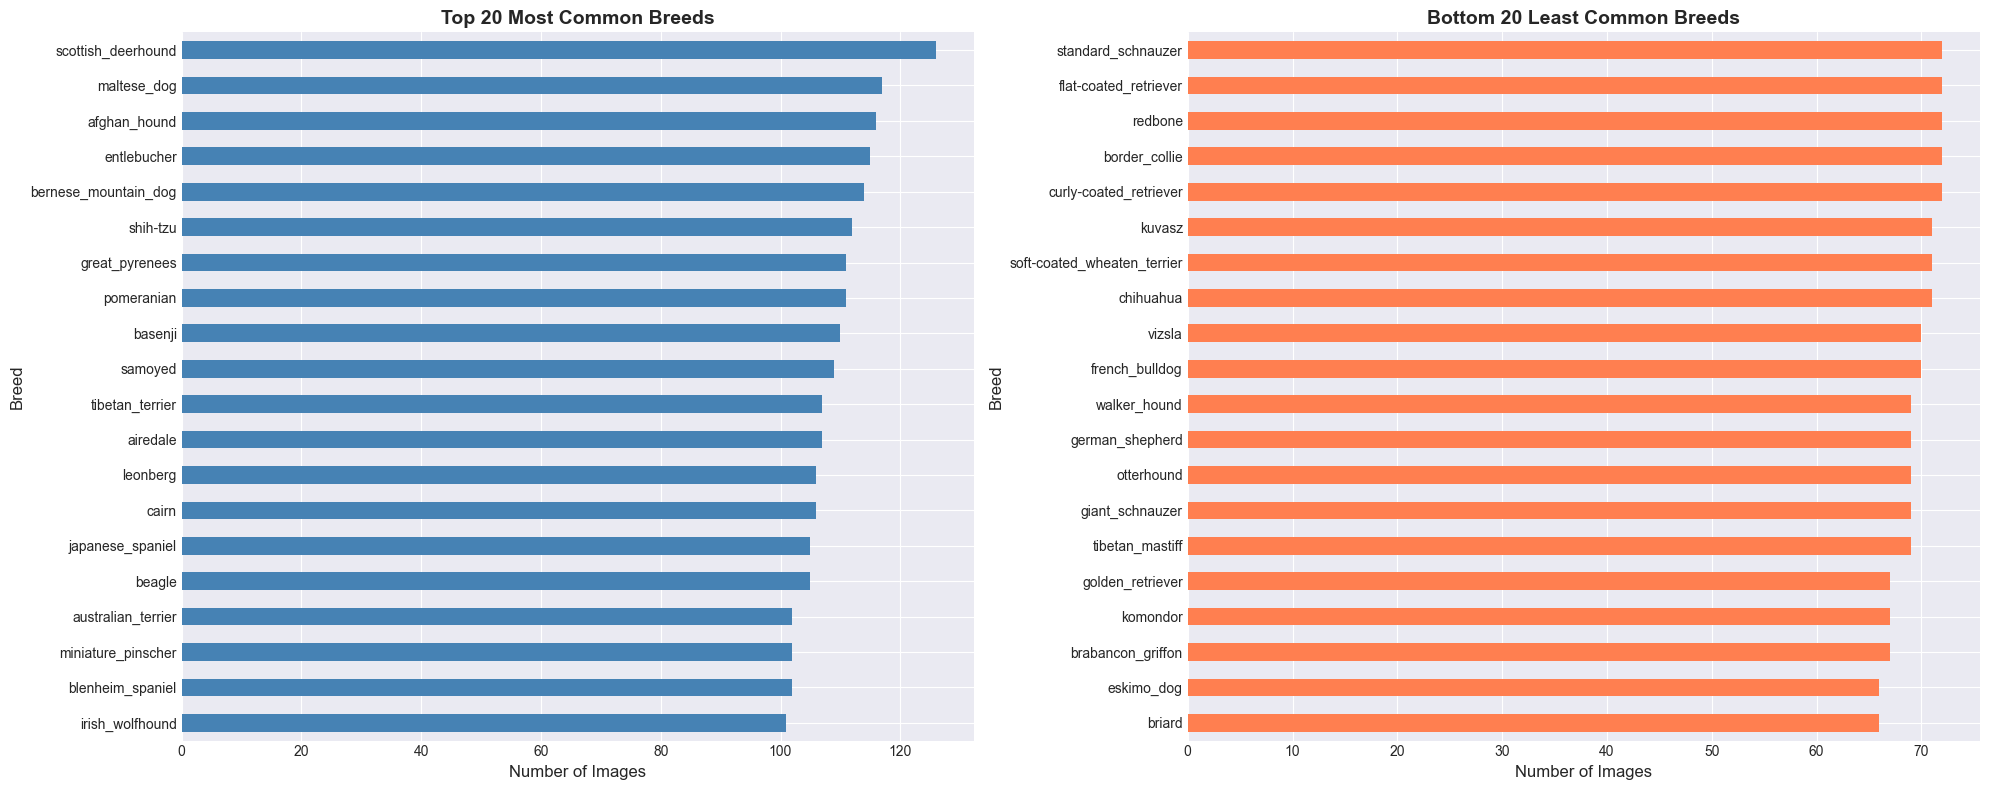

In [11]:
# Visualization: Top 20 and Bottom 20 breeds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Top 20
breed_counts.head(20).plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_xlabel('Number of Images', fontsize=12)
ax1.set_ylabel('Breed', fontsize=12)
ax1.set_title('Top 20 Most Common Breeds', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Bottom 20
breed_counts.tail(20).plot(kind='barh', ax=ax2, color='coral')
ax2.set_xlabel('Number of Images', fontsize=12)
ax2.set_ylabel('Breed', fontsize=12)
ax2.set_title('Bottom 20 Least Common Breeds', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

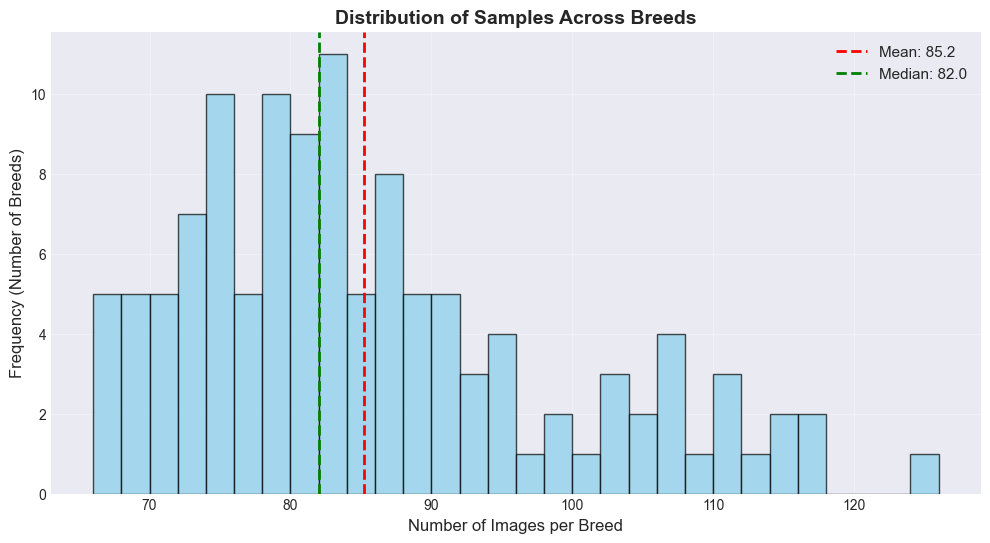

In [12]:
# Visualization: Distribution histogram
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(breed_counts.values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax.axvline(breed_counts.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {breed_counts.mean():.1f}')
ax.axvline(breed_counts.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {breed_counts.median():.1f}')
ax.set_xlabel('Number of Images per Breed', fontsize=12)
ax.set_ylabel('Frequency (Number of Breeds)', fontsize=12)
ax.set_title('Distribution of Samples Across Breeds', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
plt.show()

## Image Analysis

In [13]:
# Load random images and check dimensions
image_widths = []
image_heights = []
image_aspects = []

sample_ids = df_labels.sample(min(500, len(df_labels)), random_state=42)['id'].values
for img_id in sample_ids:
    img_path = TRAIN_DIR / f"{img_id}.jpg"
    with Image.open(img_path) as img:
        width, height = img.size
        image_widths.append(width)
        image_heights.append(height)
        image_aspects.append(width / height)

if len(image_widths) > 0:
    print(f"Width Statistics:")
    print(f"    Min: {min(image_widths)}px")
    print(f"    Max: {max(image_widths)}px")
    print(f"    Mean: {np.mean(image_widths):.2f}px")
    print(f"    Median: {np.median(image_widths):.2f}px")
    
    print(f"\nHeight Statistics:")
    print(f"    Min: {min(image_heights)}px")
    print(f"    Max: {max(image_heights)}px")
    print(f"    Mean: {np.mean(image_heights):.2f}px")
    print(f"    Median: {np.median(image_heights):.2f}px")
    
    print(f"\nAspect Ratio Statistics:")
    print(f"    Min: {min(image_aspects):.3f}")
    print(f"    Max: {max(image_aspects):.3f}")
    print(f"    Mean: {np.mean(image_aspects):.3f}")

Width Statistics:
    Min: 112px
    Max: 2048px
    Mean: 443.00px
    Median: 500.00px

Height Statistics:
    Min: 120px
    Max: 1879px
    Mean: 399.13px
    Median: 375.00px

Aspect Ratio Statistics:
    Min: 0.422
    Max: 2.000
    Mean: 1.152


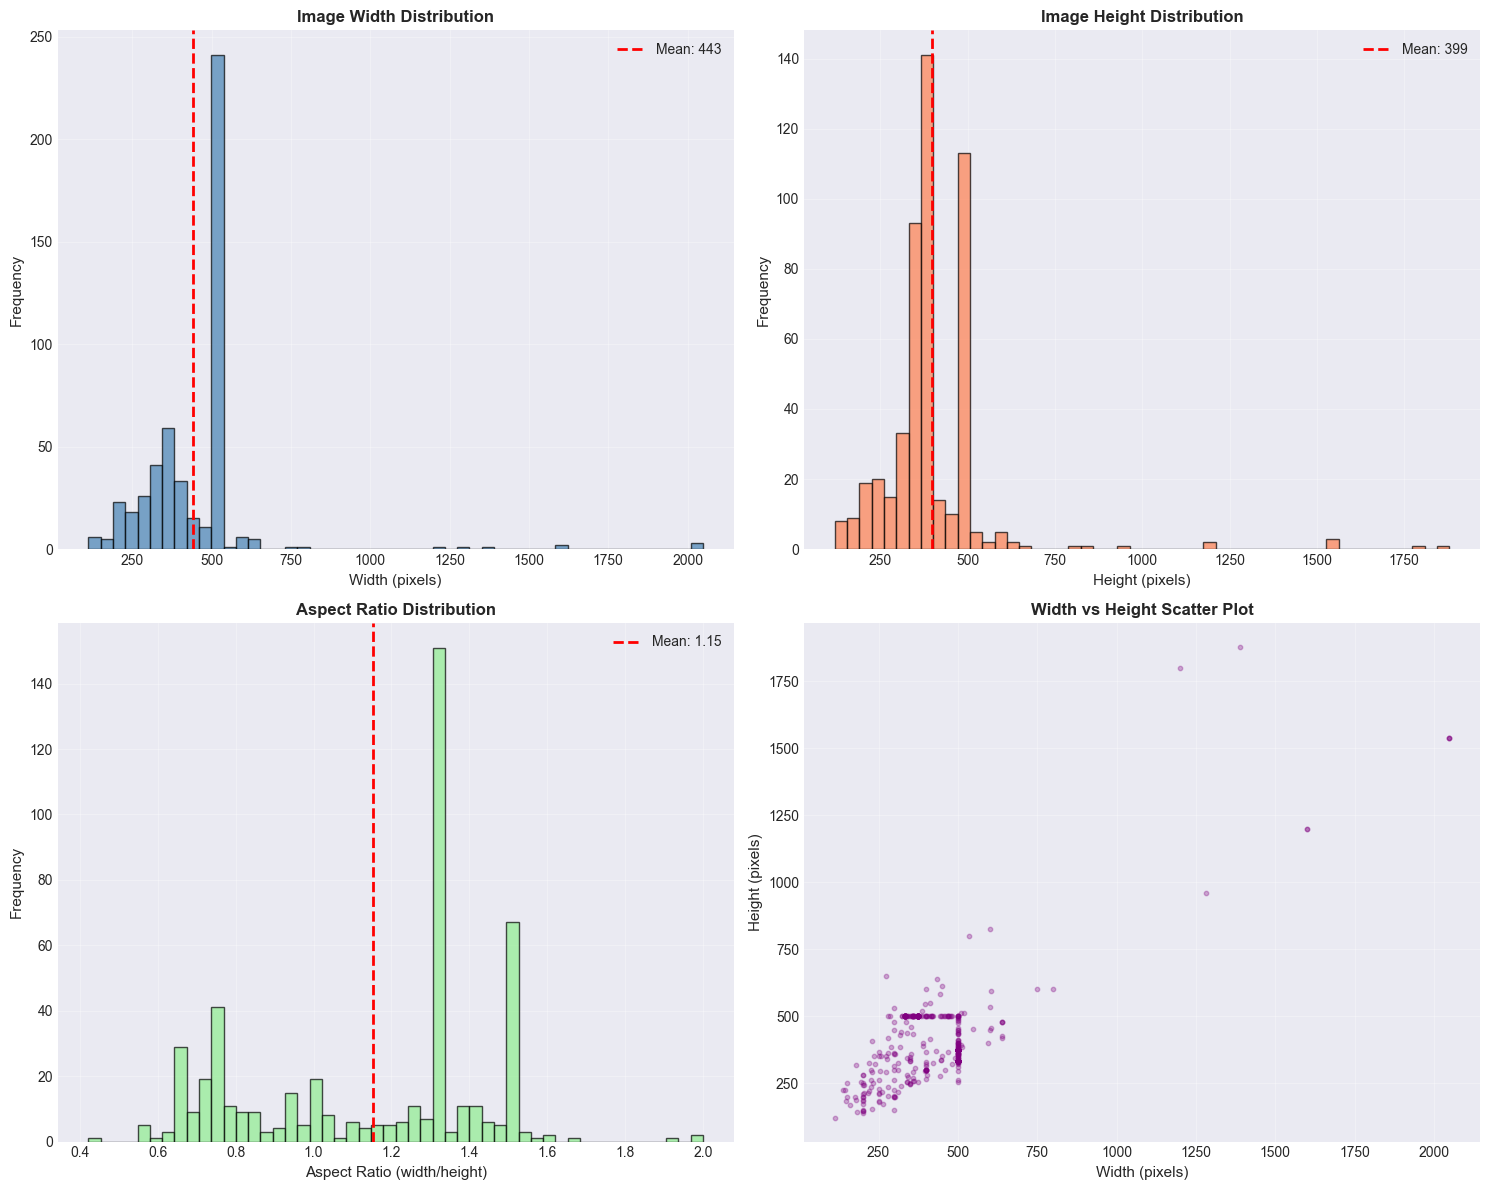

In [14]:
# Visualization: Image dimension distibutions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].hist(image_widths, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(np.mean(image_widths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(image_widths):.0f}')
axes[0, 0].set_xlabel('Width (pixels)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Image Width Distribution', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

axes[0, 1].hist(image_heights, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(np.mean(image_heights), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(image_heights):.0f}')
axes[0, 1].set_xlabel('Height (pixels)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Image Height Distribution', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

axes[1, 0].hist(image_aspects, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(np.mean(image_aspects), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(image_aspects):.2f}')
axes[1, 0].set_xlabel('Aspect Ratio (width/height)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Aspect Ratio Distribution', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

axes[1, 1].scatter(image_widths, image_heights, alpha=0.3, s=10, c='purple')
axes[1, 1].set_xlabel('Width (pixels)', fontsize=11)
axes[1, 1].set_ylabel('Height (pixels)', fontsize=11)
axes[1, 1].set_title('Width vs Height Scatter Plot', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

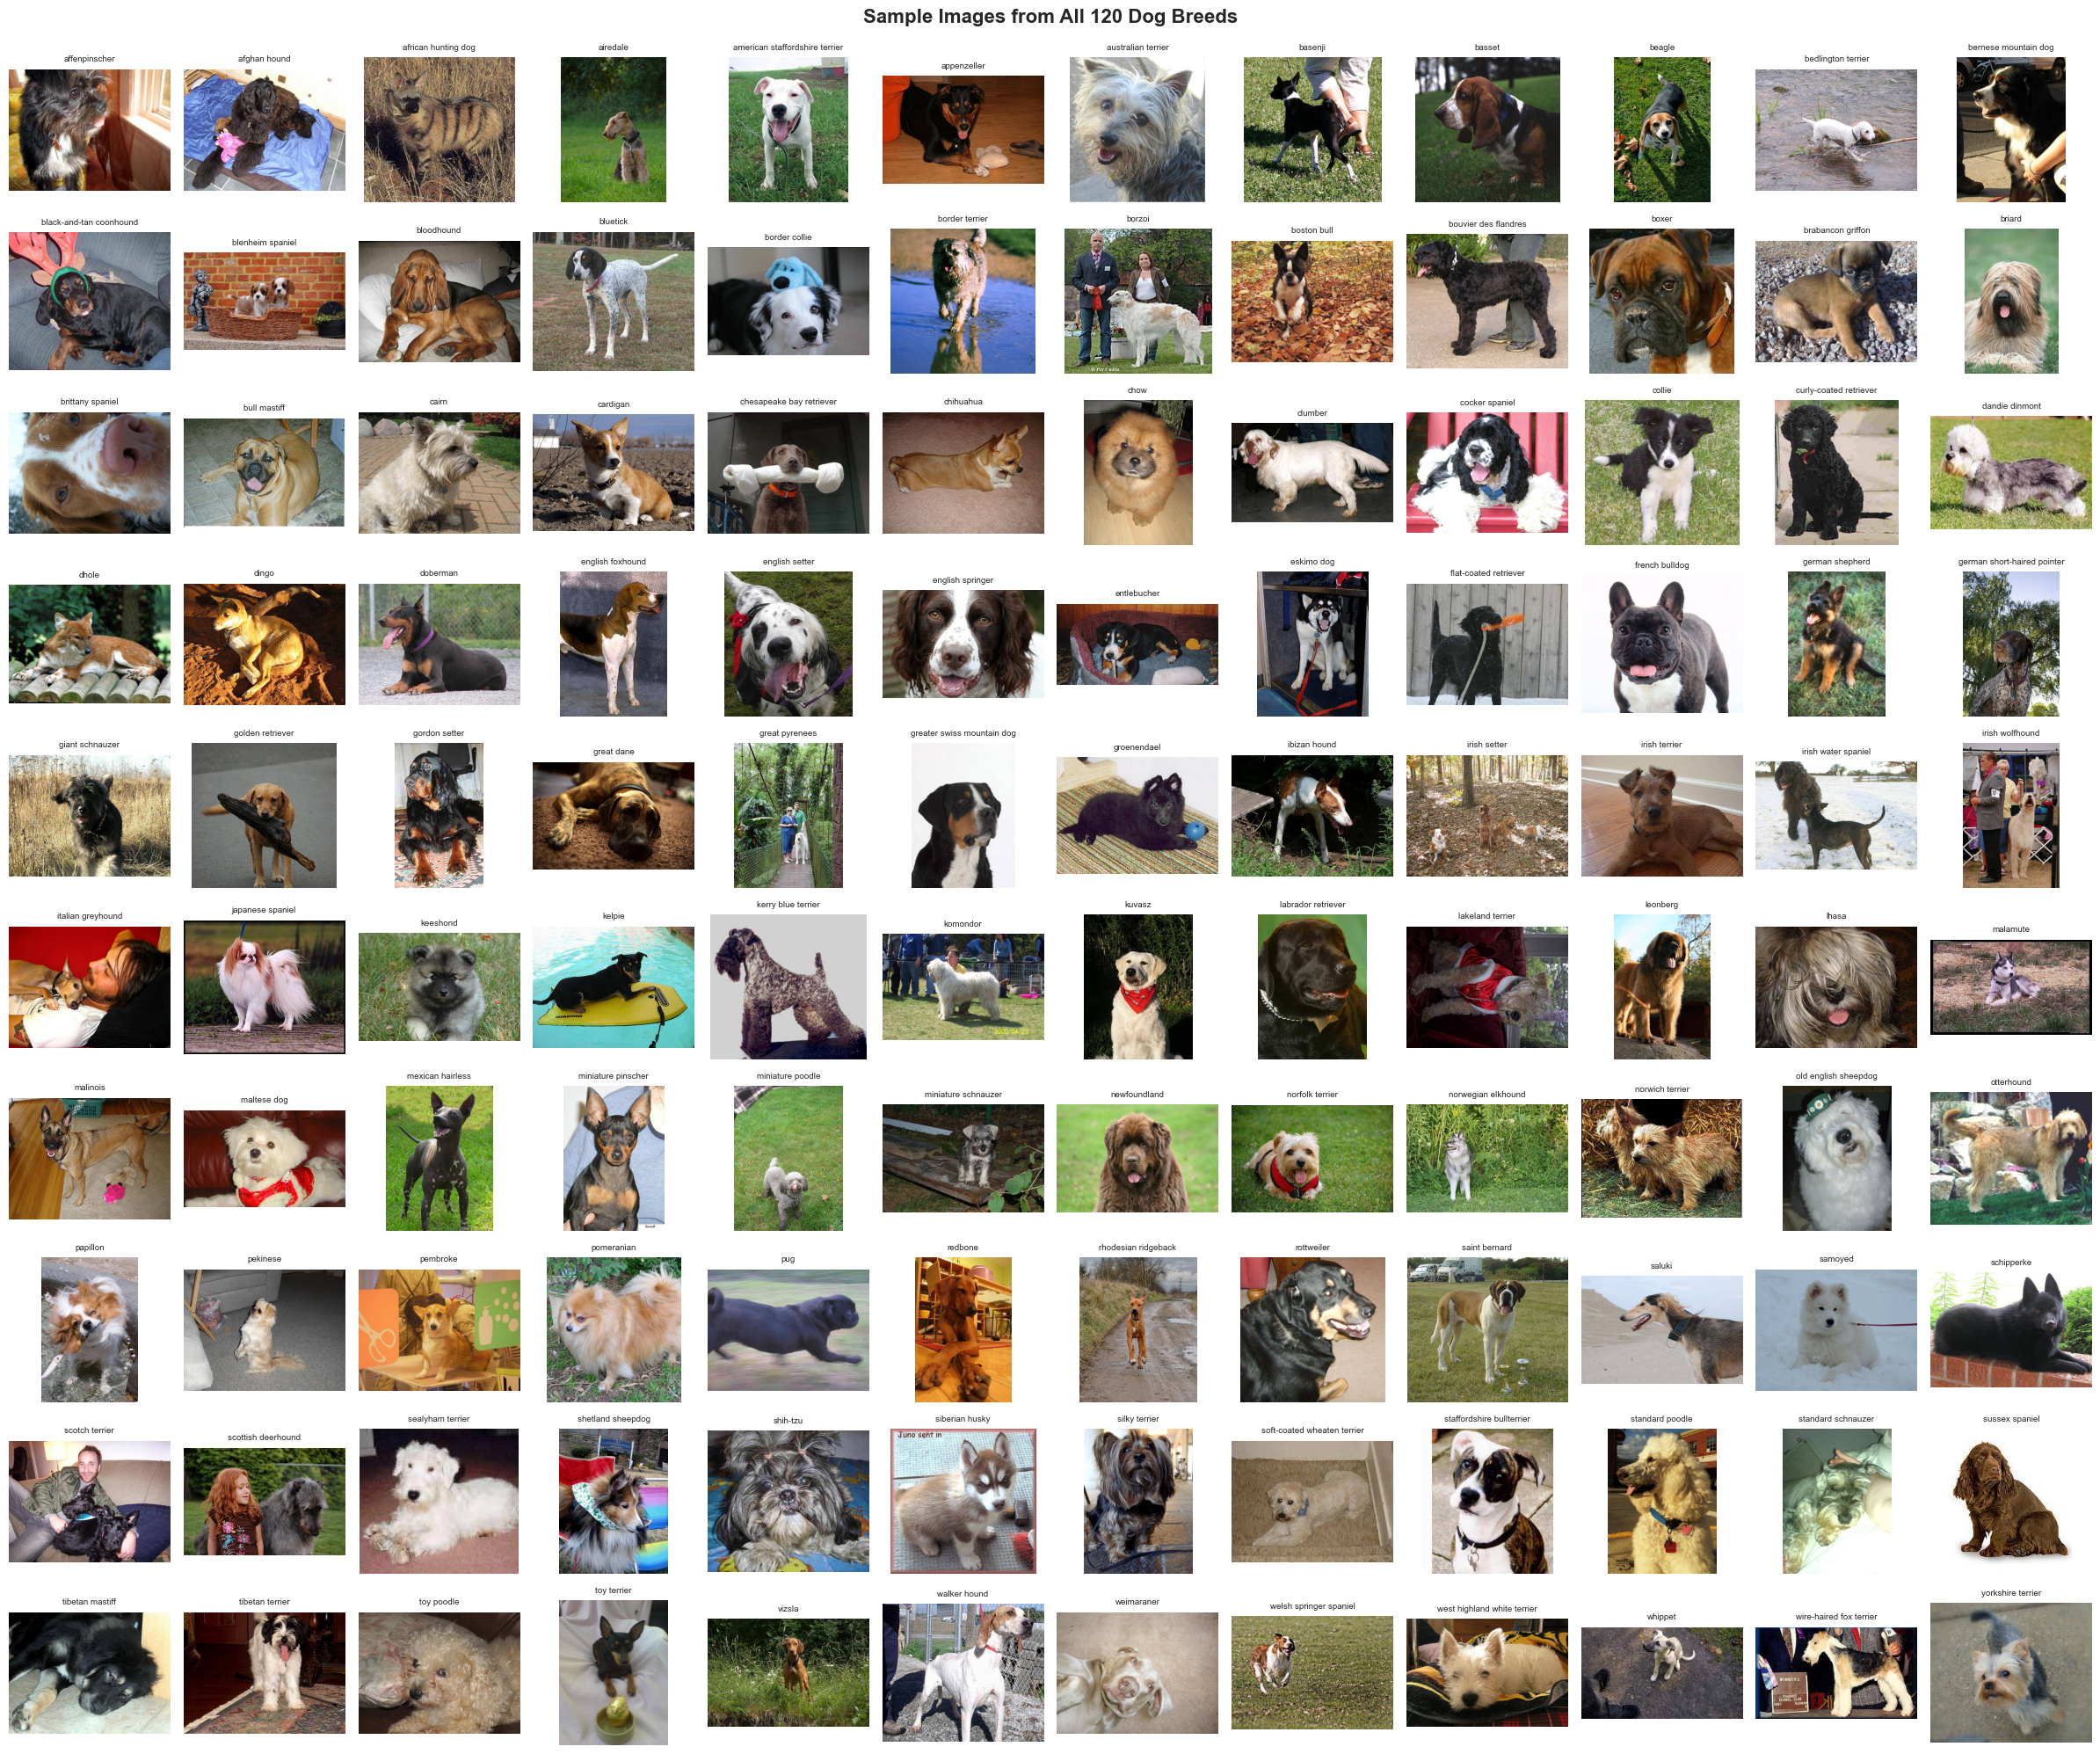

In [15]:
# Visualization: Sample Image Grid (10x12 = 120 breeds)
all_breeds = sorted(df_labels['breed'].unique())
fig, axes = plt.subplots(10, 12, figsize=(24, 20))
axes = axes.flatten()

for idx, breed in enumerate(all_breeds):
    img_id = df_labels[df_labels['breed'] == breed].iloc[0]['id']
    img_path = TRAIN_DIR / f"{img_id}.jpg"
    
    try:
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(breed.replace('_', ' '), fontsize=7)
        axes[idx].axis('off')
    except Exception as e:
        axes[idx].text(0.5, 0.5, 'Error loading', ha='center', va='center')
        axes[idx].axis('off')

plt.suptitle('Sample Images from All 120 Dog Breeds', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Statistical Analysis (Normalization Parameters)

In [16]:
# Calculate mean and std across all training images
sample_size = min(1000, len(df_labels))
sample_images = df_labels.sample(sample_size, random_state=42)

all_pixels_r = []
all_pixels_g = []
all_pixels_b = []

for idx, row in sample_images.iterrows():
    img_path = TRAIN_DIR / f"{row['id']}.jpg"
    try:
        img = Image.open(img_path).convert('RGB')
        img_array = np.array(img) / 255.0
        
        all_pixels_r.extend(img_array[:, :, 0].flatten())
        all_pixels_g.extend(img_array[:, :, 1].flatten())
        all_pixels_b.extend(img_array[:, :, 2].flatten())
    except:
        continue

In [17]:
# Calculate statistics
mean_r = np.mean(all_pixels_r)
mean_g = np.mean(all_pixels_g)
mean_b = np.mean(all_pixels_b)

std_r = np.std(all_pixels_r)
std_g = np.std(all_pixels_g)
std_b = np.std(all_pixels_b)

print(f"Dataset Normalization Parameters (from {sample_size} images):")
print(f"    Mean: [{mean_r:.4f}, {mean_g:.4f}, {mean_b:.4f}]")
print(f"    Std:  [{std_r:.4f}, {std_g:.4f}, {std_b:.4f}]")
summary_stats = {
    'Total Images': len(df_labels),
    'Number of Breeds': df_labels['breed'].nunique(),
    'Max Samples per Breed': breed_counts.max(),
    'Min Samples per Breed': breed_counts.min(),
    'Mean Samples per Breed': breed_counts.mean(),
    'Imbalance Ratio': breed_counts.max() / breed_counts.min(),
    'Mean Width': np.mean(image_widths),
    'Mean Height': np.mean(image_heights),
    'Norm Mean R': mean_r,
    'Norm Mean G': mean_g,
    'Norm Mean B': mean_b,
    'Norm Std R': std_r,
    'Norm Std G': std_g,
    'Norm Std B': std_b
}

summary_df = pd.DataFrame([summary_stats])
print(f"\nFor comparison, ImageNet normalization:")
print(f"    Mean: [0.485, 0.456, 0.406]")
print(f"    Std:  [0.229, 0.224, 0.225]")

Dataset Normalization Parameters (from 1000 images):
    Mean: [0.4739, 0.4515, 0.3945]
    Std:  [0.2684, 0.2621, 0.2656]

For comparison, ImageNet normalization:
    Mean: [0.485, 0.456, 0.406]
    Std:  [0.229, 0.224, 0.225]


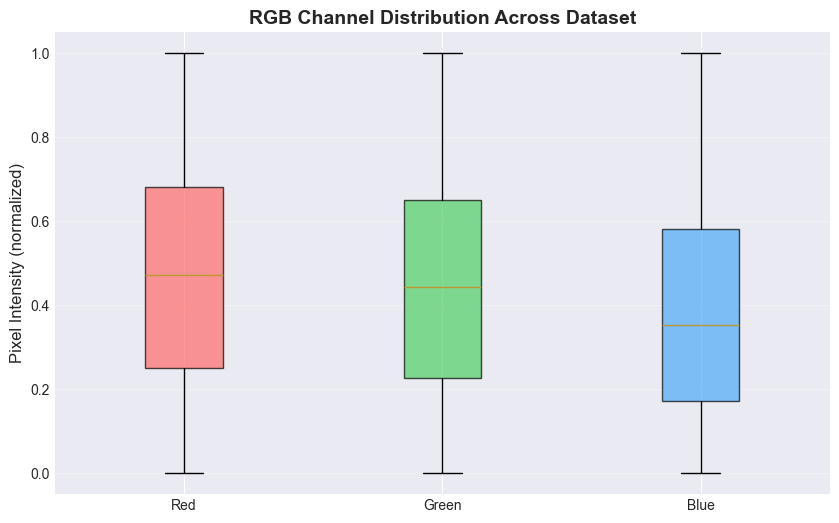

In [18]:
# Visualization: RGB distribution box plots
fig, ax = plt.subplots(figsize=(10, 6))

data_to_plot = [
    np.array(all_pixels_r),
    np.array(all_pixels_g),
    np.array(all_pixels_b)
]

bp = ax.boxplot(data_to_plot, labels=['Red', 'Green', 'Blue'], patch_artist=True)

colors = ['#ff6b6b', '#51cf66', '#4dabf7']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel('Pixel Intensity (normalized)', fontsize=12)
ax.set_title('RGB Channel Distribution Across Dataset', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3, axis='y')
plt.show()

## Summary

In [19]:
summary_stats = {
    'Total Images': len(df_labels),
    'Number of Breeds': df_labels['breed'].nunique(),
    'Max Samples per Breed': breed_counts.max(),
    'Min Samples per Breed': breed_counts.min(),
    'Mean Samples per Breed': breed_counts.mean(),
    'Imbalance Ratio': breed_counts.max() / breed_counts.min(),
    'Mean Width': np.mean(image_widths),
    'Mean Height': np.mean(image_heights),
    'Norm Mean R': mean_r,
    'Norm Mean G': mean_g,
    'Norm Mean B': mean_b,
    'Norm Std R': std_r,
    'Norm Std G': std_g,
    'Norm Std B': std_b
}

summary_df = pd.DataFrame([summary_stats])
summary_df.to_csv('eda_summary_statistics.csv', index=False)